In [31]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
from IPython.display import HTML

In [32]:
def animateLists(xlist,ylist):
    #https://stackoverflow.com/questions/46236902/redrawing-seaborn-figures-for-animations
    lim = (-3,3)

    x, y = xlist[:2],ylist[:2]
    g = sns.JointGrid(x=x, y=y, height=4,xlim=lim,ylim=lim)
    g.ax_joint.plot(x[0],x[1],'*C1',ms=20,markeredgewidth=1,markeredgecolor='k')
    def prep_axes(g, xlim, ylim):
        g.ax_joint.clear()
        g.ax_joint.set_xlim(xlim)
        g.ax_joint.set_ylim(ylim)
        g.ax_marg_x.clear()
        g.ax_marg_x.set_xlim(xlim)
        g.ax_marg_y.clear()
        g.ax_marg_y.set_ylim(ylim)
        plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
        plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
        plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
        plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
        plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
        plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
        plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
        plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)


    def animate(i):
        prep_axes(g, lim, lim)
        x,y=xlist[:2+i*10],ylist[:2+i*10]
        g.x, g.y =x,y
        sns.scatterplot(x=x,y=y,ax=g.ax_joint)
        sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
        sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
        g.ax_joint.plot(x[0],x[1],'*C1',ms=20,markeredgewidth=1,markeredgecolor='k')
    ani = animation.FuncAnimation(g.fig, animate, frames=100, repeat=True)
    return ani


# MCMC

### 2D Normal Distribution
$$
 f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}}
               \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right),
$$

In [3]:
def logf(x):
    sigma = np.eye(2)
    return -np.sqrt((2*np.pi)**2 *1) - 0.5*(x.T@sigma@x)

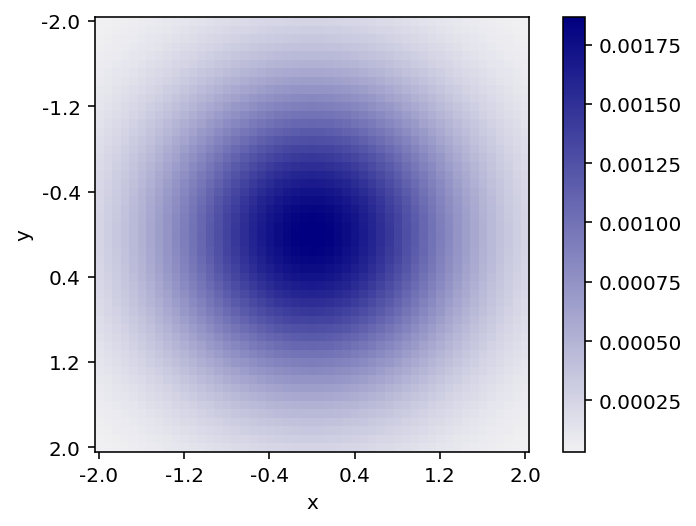

In [37]:
xs = np.array([ (x,y) for x in np.linspace(-2,2,51) for y in np.linspace(-2,2,51)])
ys = np.array([np.exp(logf(x)) for x in xs])
plt.imshow(ys.reshape(51,51),cmap=sns.light_palette("Navy", as_cmap=True))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(0,51,10),np.round(np.linspace(-2,2,51)[::10],1))
plt.yticks(range(0,51,10),np.round(np.linspace(-2,2,51)[::10],1))
plt.show()

In [5]:
x           = np.array([2*np.random.random()-1,2*np.random.random()-1])
logf_old    = logf(x)
xlist,ylist = [],[]
#paramaters 
N = 10_000
step = 0.1
accept = 0
for n in range(N):
    xlist.append(x[0]); ylist.append(x[1])
    #take random (normal) step
    xnew = np.random.multivariate_normal(x,[[step,0],[0,step]])
    logf_new = logf(xnew)
    if np.log(np.random.random()) < logf_new - logf_old:
        x = xnew
        logf_old = logf_new
        accept+=1
print("acceptance:",accept/N)


acceptance: 0.8427


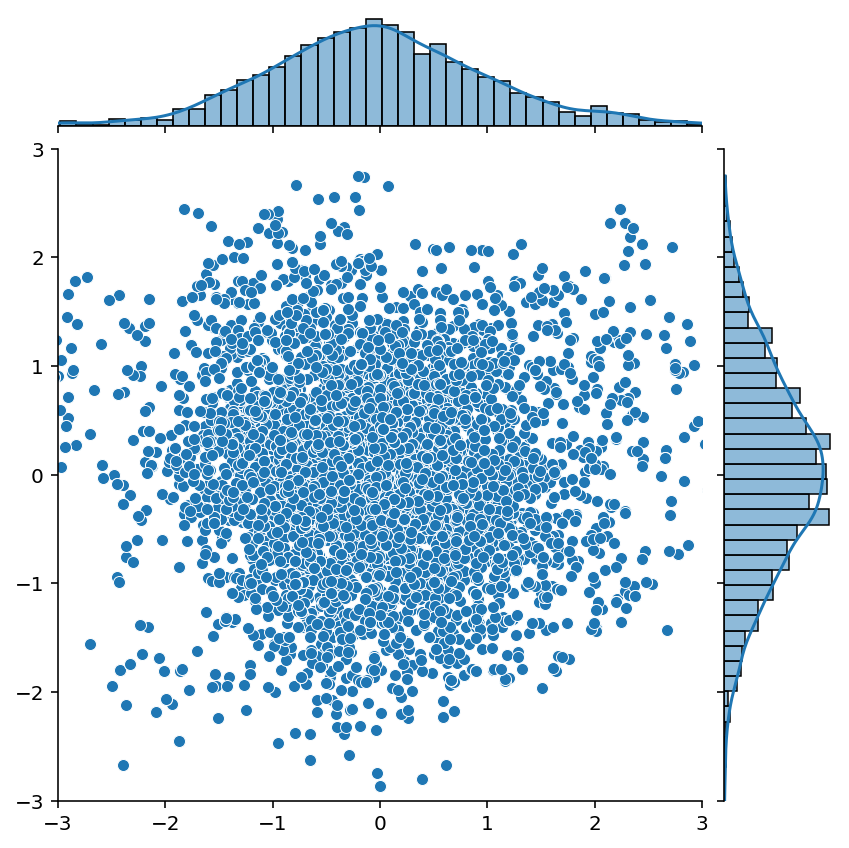

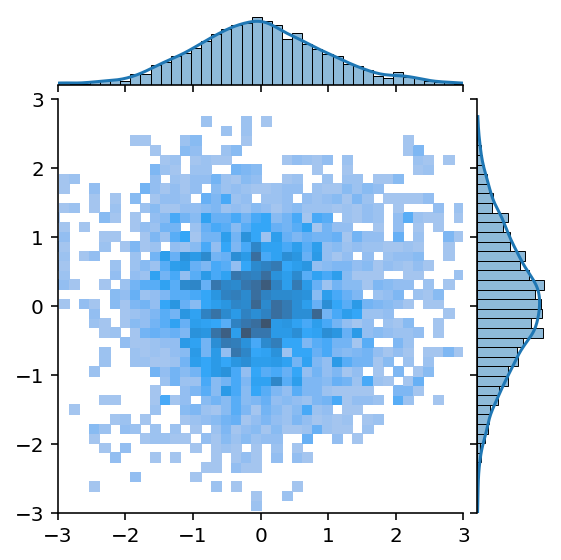

In [17]:
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()
x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y, height=4,xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

In [ ]:
ani=animateLists(xlist,ylist)
HTML(ani.to_jshtml())

### Ring
$$
r=1.5, \sigma=0.01
$$

In [18]:
def logf(x):
    r = 1.5
    sigma = 0.01
    rx= np.linalg.norm(x)
    return -(r-rx)**2/sigma

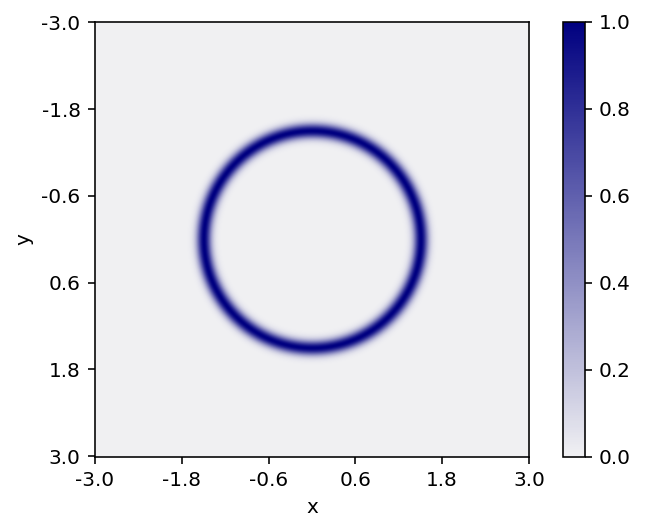

In [23]:
xs = np.array([ (x,y) for x in np.linspace(-3,3,501) for y in np.linspace(-3,3,501)])
ys = np.array([np.exp(logf(x)) for x in xs])
plt.imshow(ys.reshape(501,501),cmap=sns.light_palette("Navy", as_cmap=True))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(0,501,100),np.round(np.linspace(-3,3,501)[::100],1))
plt.yticks(range(0,501,100),np.round(np.linspace(-3,3,501)[::100],1))
plt.show()

In [20]:
x0  = np.array([2*np.random.random()-1,2*np.random.random()-1])
x   = x0.copy()
logf_old    = logf(x)
xlist,ylist = [],[]
#paramaters 
N = 10_000
step = 0.1
accept = 0
for n in range(N):
    xlist.append(x[0]); ylist.append(x[1])
    #take random (normal) step
    xnew = np.random.multivariate_normal(x,[[step,0],[0,step]])
    logf_new = logf(xnew)
    if np.log(np.random.random()) < logf_new - logf_old:
        x = xnew
        logf_old = logf_new
        accept+=1
print("acceptance:",accept/N)


acceptance: 0.262


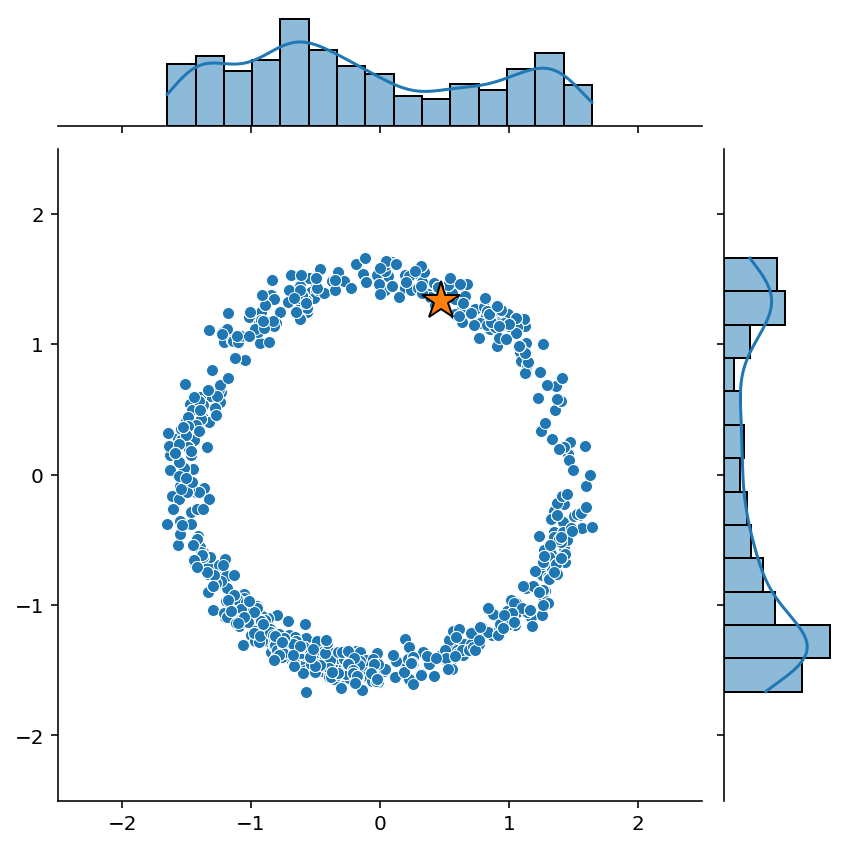

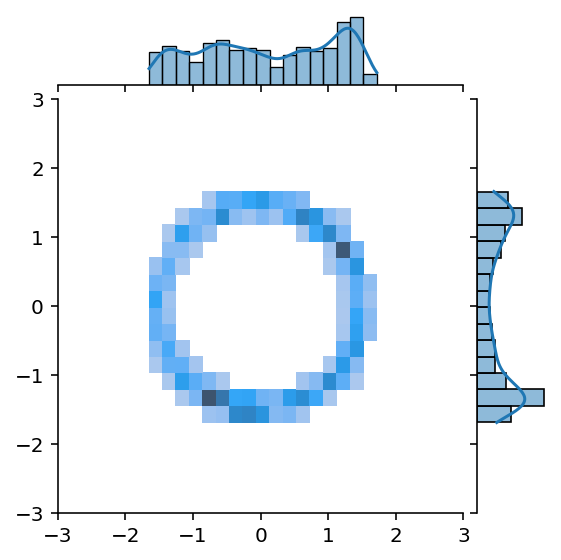

In [21]:

f = sns.jointplot(x=xlist[3*len(xlist)//4:],y=ylist[3*len(ylist)//4:],ylim=(-2.5, 2.5), xlim=(-2.5, 2.5),
              marginal_kws=dict(kde=True))
f.ax_joint.plot(x[0],x[1],'*C1',ms=20,markeredgewidth=1,markeredgecolor='k')
plt.show()
x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y, height=4,xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

In [ ]:
ani=animateLists(xlist,ylist)
HTML(ani.to_jshtml())

# Hamiltonian Monte Carlo

In [34]:
def leapfrog(x,p,dt,df):
    #Assume M = Identity
    Minv = np.identity(2)
    
    pnew   = p + dt/2*df(x)
    xnew   = x + dt*Minv@pnew
    pnew   = pnew + dt/2*df(xnew)
    return xnew,pnew
def findReasonableEpsilon(x,logf):
    # Alg 4 https://arxiv.org/pdf/1111.4246.pdf
    p = np.random.multivariate_normal([0,0],np.identity(2)) 
    xnew,pnew = x.copy(),p.copy()
    dt = 1
    xnew,pnew = leapfrog(xnew,pnew,dt,logf)

    logH_old    = 0.5*(p.T@p)+ (-logf(x))
    logH_new    = 0.5*(pnew.T@pnew)+ (-logf(xnew))
    a = 1 if -logH_new + logH_old > np.log(0.5) else -1

    while (-logH_new + logH_old)*a > -a*np.log(2):
        dt*=2**a
        xnew,pnew = leapfrog(x.copy(),p.copy(),dt,logf)
        logH_new    = 0.5*(pnew.T@pnew)+ (-logf(xnew))
        if dt < 1e-100: raise RuntimeError("Failed to find dt!")
    return dt

### 2D Normal Distribution
$$
 f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}}
               \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right),
$$

In [35]:
def logf(x):
    sigma = np.eye(2)
    return -np.sqrt((2*np.pi)**2 *1) - 0.5*(x.T@sigma@x)
def grad_logf(x):
    sigma = np.eye(2)
    #return -0.5*(sigma+sigma.T)@(x-0)
    return -(sigma)@(x-0)

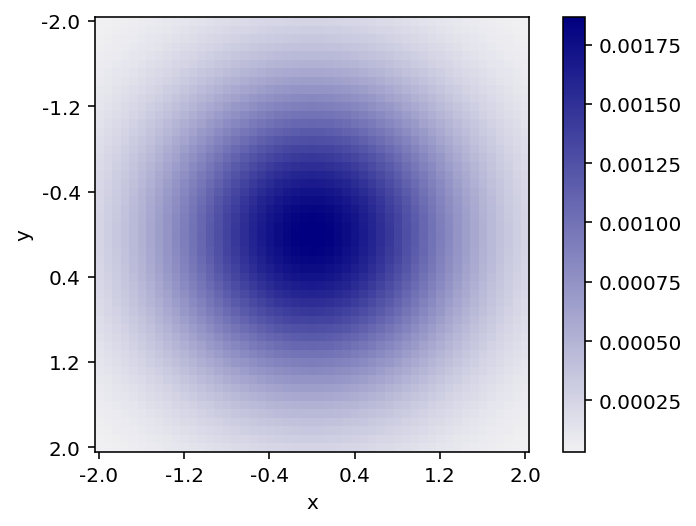

In [36]:
xs = np.array([ (x,y) for x in np.linspace(-2,2,51) for y in np.linspace(-2,2,51)])
ys = np.array([np.exp(logf(x)) for x in xs])
plt.imshow(ys.reshape(51,51),cmap=sns.light_palette("Navy", as_cmap=True))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(0,51,10),np.round(np.linspace(-2,2,51)[::10],1))
plt.yticks(range(0,51,10),np.round(np.linspace(-2,2,51)[::10],1))
plt.show()

In [38]:
x = np.array([2*np.random.random()-1,2*np.random.random()-1])

p = np.random.multivariate_normal([0,0],np.identity(2)) 
Minv = np.linalg.inv(np.identity(2))

logf_old = logf(x)
logH_old    = 0.5*(p.T@Minv@p)+ (-logf_old)

xlist,ylist = [],[]

#paramaters 
N = 10_000
L = 30
#dt = 0.01
dt=findReasonableEpsilon(x,logf)
print("starting dt=",dt)
accept = 0
for n in range(N):
    xlist.append(x[0]); ylist.append(x[1])
    #take random (normal) step
    xnew,pnew = x.copy(),np.random.multivariate_normal([0,0],np.identity(2)) 
    for l in range(L):
        xnew,pnew = leapfrog(xnew,pnew,dt,grad_logf)
    logH_new = 0.5*(pnew.T@Minv@pnew) + (- logf(xnew))

    if np.log(np.random.random()) < -logH_new + logH_old:
        x = xnew
        p = pnew
        logH_old = logH_new
        accept+=1
print("acceptance:",accept/N)


starting dt= 0.25
acceptance: 0.6654


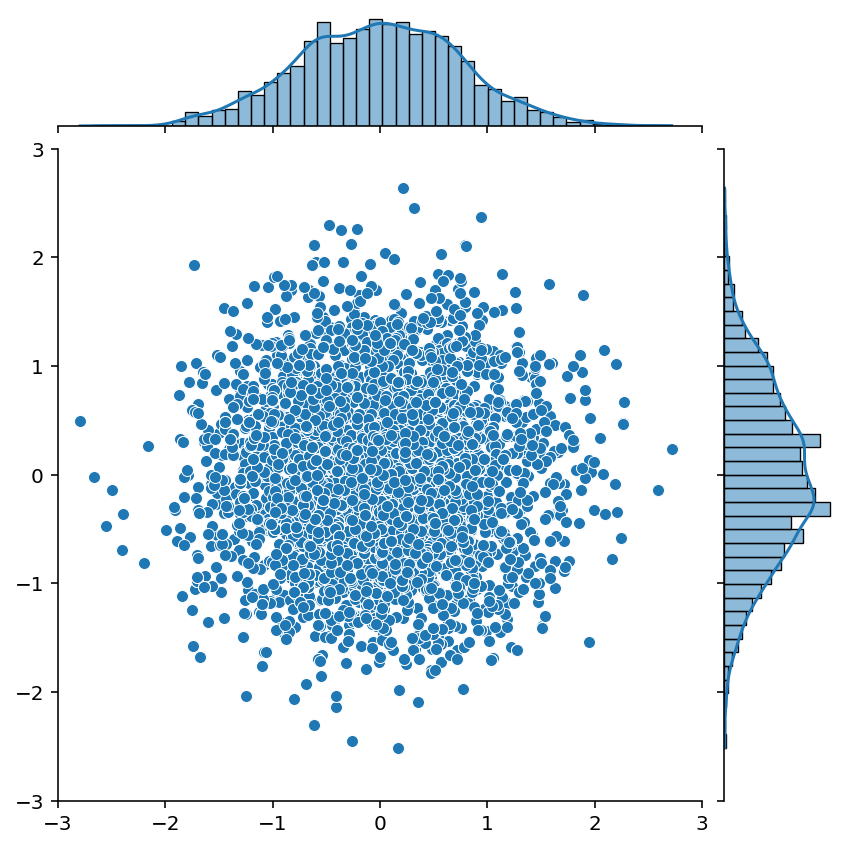

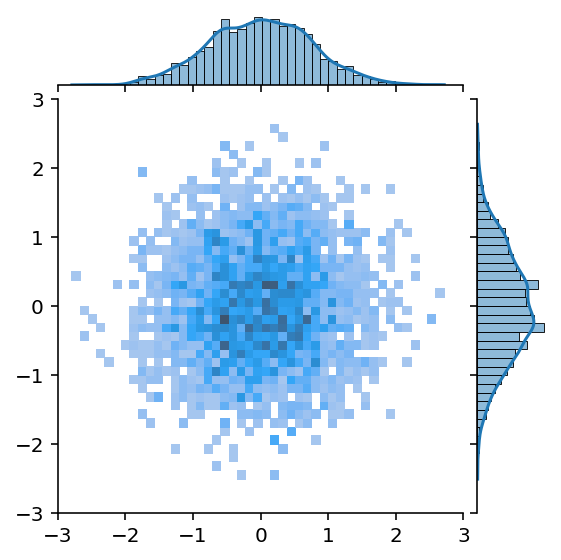

In [39]:
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()
x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y, height=4,xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

### Ring
$$
r=1.5, \sigma=0.01
$$

In [106]:
def logf(x):
    r = 1.5
    sigma = 0.01
    rx= np.linalg.norm(x)
    return -(r-rx)**2/sigma
def grad_logf(x):
    r = 1.5
    sigma = 0.01
    rx = np.linalg.norm(x)
    if rx==0.: return np.array([0,0])
    return 2*(r/rx-1)*x/sigma

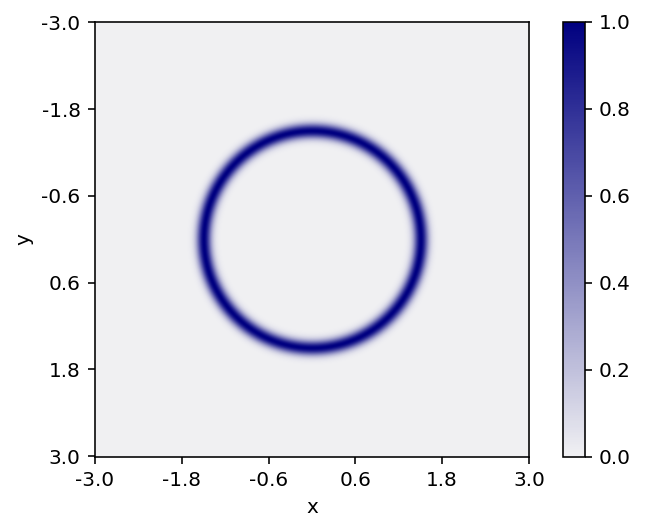

In [43]:
xs = np.array([ (x,y) for x in np.linspace(-3,3,501) for y in np.linspace(-3,3,501)])
ys = np.array([np.exp(logf(x)) for x in xs])
plt.imshow(ys.reshape(501,501),cmap=sns.light_palette("Navy", as_cmap=True))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(0,501,100),np.round(np.linspace(-3,3,501)[::100],1))
plt.yticks(range(0,501,100),np.round(np.linspace(-3,3,501)[::100],1))
plt.show()

starting dt= 0.125
acceptance: 0.5548


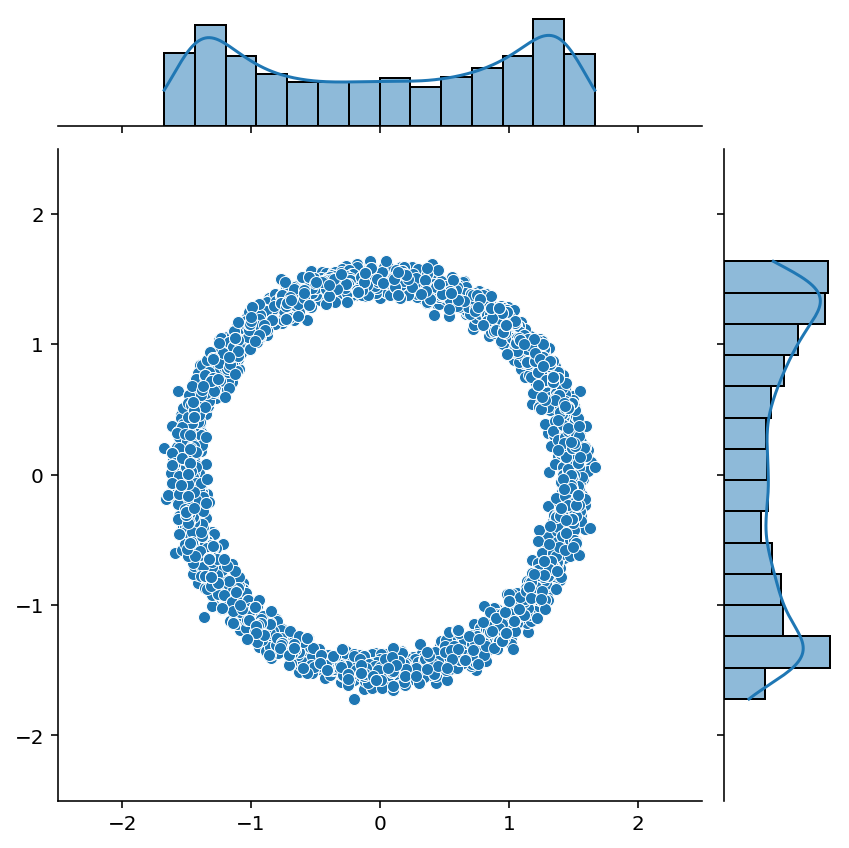

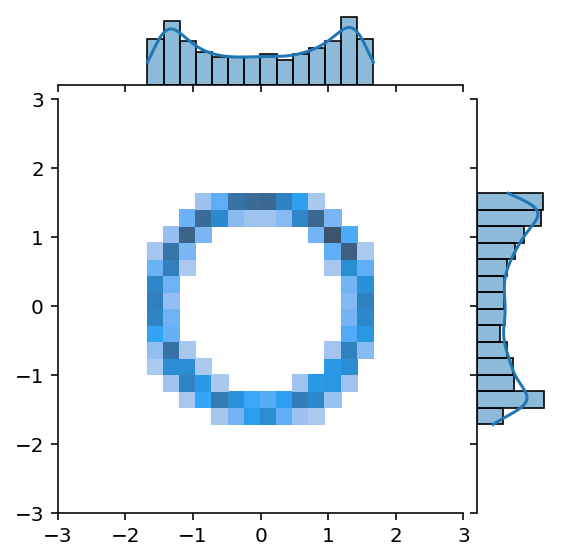

In [44]:
x = np.array([2*np.random.random()-1,2*np.random.random()-1])

p = np.random.multivariate_normal([0,0],np.identity(2)) 
Minv = np.linalg.inv(np.identity(2))

logf_old = logf(x)
logH_old    = 0.5*(p.T@Minv@p)+ (-logf_old)

xlist,ylist = [],[]

#paramaters 
N = 10_000
L = 35
#dt = 0.1
dt=findReasonableEpsilon(x,logf)
print("starting dt=",dt)
accept = 0
for n in range(N):
    xlist.append(x[0]); ylist.append(x[1])
    #take random (normal) step
    xnew,pnew = x.copy(),np.random.multivariate_normal([0,0],np.identity(2)) 
    for l in range(L):
        xnew,pnew = leapfrog(xnew,pnew,dt,grad_logf)
    logH_new = 0.5*(pnew.T@Minv@pnew) + (- logf(xnew))

    if np.log(np.random.random()) < -logH_new + logH_old:
        x = xnew
        p = pnew
        logH_old = logH_new
        accept+=1
print("acceptance:",accept/N)
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],ylim=(-2.5, 2.5), xlim=(-2.5, 2.5),marginal_kws=dict(kde=True))
plt.show()

x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y, height=4,xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

In [ ]:
ani=animateLists(xlist,ylist)
HTML(ani.to_jshtml())

#### Looking at the Leapfrog Walk on a ring

In [453]:
print("Starting at ",x)

Starting at  [-1.29469502  0.73366737]


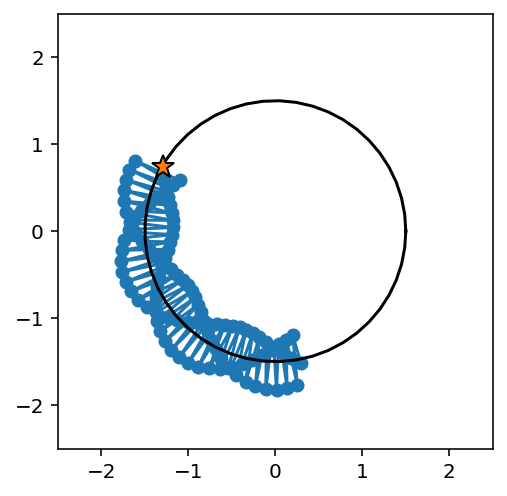

In [125]:
x = np.array([-1.29469502 ,0.73366737])
xnew,pnew = x.copy(),np.random.multivariate_normal([0,0],np.identity(2)) 
dt = 0.125
L = 100
tx,ty = [],[]
for l in range(L):
    xnew,pnew = leapfrog(xnew,pnew,dt,grad_logf)
    tx.append(xnew[0]);ty.append(xnew[1])

plt.plot(tx,ty,'o-')
theta = np.linspace(0,2*np.pi)
plt.plot(1.5*np.cos(theta),1.5*np.sin(theta),'k')
plt.gca().set_aspect('equal')
plt.plot(x[0],x[1],'*C1',ms=12,markeredgewidth=1,markeredgecolor='k')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.show()



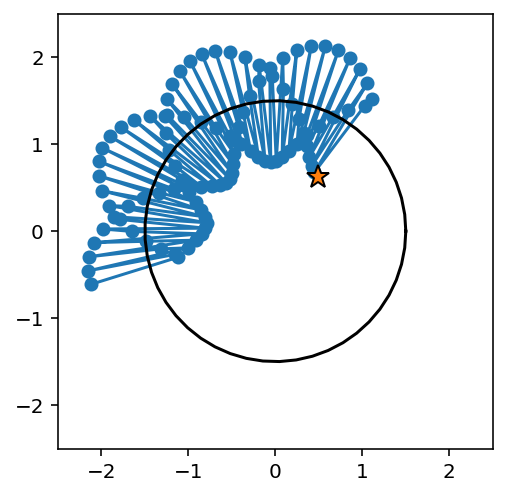

In [117]:
x = np.array([np.random.random(),np.random.random()])
xnew,pnew = x.copy(),np.random.multivariate_normal([0,0],np.identity(2)) 
dt = 0.125
L = 100
tx,ty = [],[]
for l in range(L):
    xnew,pnew = leapfrog(xnew,pnew,dt,grad_logf)
    tx.append(xnew[0]);ty.append(xnew[1])

plt.plot(tx,ty,'o-')
theta = np.linspace(0,2*np.pi)
plt.plot(1.5*np.cos(theta),1.5*np.sin(theta),'k')
plt.gca().set_aspect('equal')
plt.plot(x[0],x[1],'*C1',ms=12,markeredgewidth=1,markeredgecolor='k')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.show()

# Naive NUTS (Alg2)

In [45]:
def logf(x):
    sigma = np.eye(2)
    return -np.sqrt((2*np.pi)**2 *1) - 0.5*(x.T@sigma@x)
def grad_logf(x):
    sigma = np.eye(2)
    #return -0.5*(sigma+sigma.T)@(x-0)
    return -(sigma)@(x-0)

In [46]:
# def leapfrog(x,p,dt,df):
#     #Assume M = Identity
#     Minv = np.identity(2)
    
#     pnew   = p + dt/2*df(x)
#     xnew   = x + dt*Minv@pnew
#     pnew   = pnew + dt/2*df(xnew)
#     return xnew,pnew
# def findReasonableEpsilon(x,logf):
#     # Alg 4 https://arxiv.org/pdf/1111.4246.pdf
#     p = np.random.multivariate_normal([0,0],np.identity(2)) 
#     xnew,pnew = x.copy(),p.copy()
#     dt = 1
#     xnew,pnew = leapfrog(xnew,pnew,dt,logf)

#     logH_old    = 0.5*(p.T@p)+ (-logf(x))
#     logH_new    = 0.5*(pnew.T@pnew)+ (-logf(xnew))
#     a = 1 if -logH_new + logH_old > np.log(0.5) else -1

#     while (-logH_new + logH_old)*a > -a*np.log(2):
#         dt*=2**a
#         xnew,pnew = leapfrog(x.copy(),p.copy(),dt,logf)
#         logH_new    = 0.5*(pnew.T@pnew)+ (-logf(xnew))
#         if dt < 1e-100: raise RuntimeError("Failed to find dt!")
#     return dt

def buildTree(x,p,u,v,j,dt):
    #Based on alg 2 1111.4246
    # x - position vector
    # p - fictitious momentum
    # u - slice helper variable
    # v - direction in time
    # j - tree depth
    # dt - leapfrog step
    Delta_max = 1000
    if j==0:
        #Base case -take one leapfrog step in direction v
        xnew,pnew = leapfrog(x,p,v*dt,grad_logf)
        C = []
        logH = 0.5*pnew.T@pnew - logf(xnew)
        if np.log(u)<= -logH: C = [(xnew,pnew)]
        s = 1 if np.log(u)< Delta_max-logH else 0
        return xnew,pnew,xnew,pnew,C,s
    else:
        # recursion - build the left and right subtrees
        xm,pm,xp,pp,C,s = buildTree(x,p,u,v,j-1,dt)
        if v==-1:
            xm,pm,_,_,Cp,sp = buildTree(xm,pm,u,v,j-1,dt)
        else:
            _,_,xp,pp,Cp,sp = buildTree(xp,pp,u,v,j-1,dt)
        s = s*sp *(1 if (xp-xm)@pm >=0 else 0)*(1 if (xp-xm)@pp >=0 else 0)
        C = C+Cp
        return xm,pm,xp,pp,C,s
def NUTS2(x0,dt,M=1):
    x=x0.copy()
    xlist = [x,]
    for m in range(M):
        p = np.random.multivariate_normal([0,0],np.identity(2)) 
        u = np.random.random()*np.exp(logf(x)-0.5*p.T@p)
        xm,xp = x.copy(),x.copy()
        pm,pp = p.copy(),p.copy()
        j = 0
        C = [(x,p)]
        s = 1
        while s==1:
            v = np.sign(np.random.uniform(-1,1))
            if v == -1:
                xm,pm,_,_,Cp,sp = buildTree(xm,pm,u,v,j,dt)
            else:
                _,_,xp,pp,Cp,sp = buildTree(xp,pp,u,v,j,dt)
            if sp ==1:
                C = C+Cp
            s = sp*(1 if (xp-xm)@pm >=0 else 0)*(1 if (xp-xm)@pp >=0 else 0)
            j+=1
        x,p = C[np.random.randint(len(C))]
        xlist.append((x,p))
    return xlist

### 2D Normal Distribution
$$
 f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}}
               \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right),
$$

In [98]:
def logf(x):
    sigma = np.eye(2)
    return -np.sqrt((2*np.pi)**2 *1) - 0.5*(x.T@sigma@x)
def grad_logf(x):
    sigma = np.eye(2)
    #return -0.5*(sigma+sigma.T)@(x-0)
    return -(sigma)@(x-0)

In [ ]:
xs = np.array([ (x,y) for x in np.linspace(-2,2,51) for y in np.linspace(-2,2,51)])
ys = np.array([np.exp(logf(x)) for x in xs])
plt.imshow(ys.reshape(51,51))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(0,51,10),np.round(np.linspace(-2,2,51)[::10],1))
plt.yticks(range(0,51,10),np.round(np.linspace(-2,2,51)[::10],1))
plt.show()

In [65]:
x = np.array([2*np.random.random()-1,2*np.random.random()-1])

p = np.random.multivariate_normal([0,0],np.identity(2)) 
Minv = np.linalg.inv(np.identity(2))

logf_old = logf(x)
logH_old    = 0.5*(p.T@Minv@p)+ (-logf_old)

xlist,ylist = [],[]

#paramaters 
N = 10_000
L = 30
#dt = 0.01
dt=findReasonableEpsilon(x,logf)
print("starting dt=",dt)
accept = 0
for n in range(N):
    xlist.append(x[0]); ylist.append(x[1])
    #take random (normal) step
    xnew,pnew = NUTS2(x,dt,1)[-1]
    logH_new = 0.5*(pnew.T@Minv@pnew) + (- logf(xnew))

    if np.log(np.random.random()) < -logH_new + logH_old:
        x = xnew
        p = pnew
        logH_old = logH_new
        accept+=1
print("acceptance:",accept/N)


starting dt= 0.0625
acceptance: 0.6617


In [ ]:
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()

### Ring
$$
r=1.5, \sigma=0.01
$$

In [140]:
def logf(x):
    r = 1.5
    sigma = 0.01
    rx= np.linalg.norm(x)
    return -(r-rx)**2/sigma
def grad_logf(x):
    r = 1.5
    sigma = 0.01
    rx = np.linalg.norm(x)
    if rx==0.: return np.array([0,0])
    return 2*(r/rx-1)*x/sigma

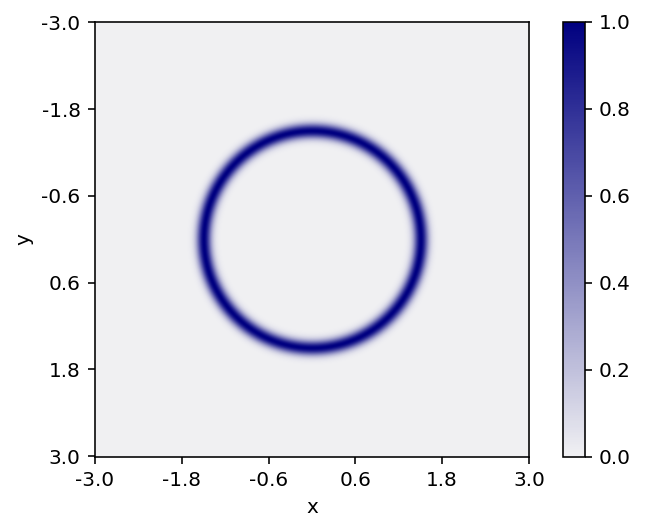

In [48]:
xs = np.array([ (x,y) for x in np.linspace(-3,3,501) for y in np.linspace(-3,3,501)])
ys = np.array([np.exp(logf(x)) for x in xs])
plt.imshow(ys.reshape(501,501),cmap=sns.light_palette("Navy", as_cmap=True))
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(range(0,501,100),np.round(np.linspace(-3,3,501)[::100],1))
plt.yticks(range(0,501,100),np.round(np.linspace(-3,3,501)[::100],1))
plt.show()

In [154]:
x = np.array([2*np.random.random()-1,2*np.random.random()-1])

p = np.random.multivariate_normal([0,0],np.identity(2)) 
Minv = np.linalg.inv(np.identity(2))

logf_old = logf(x)
logH_old    = 0.5*(p.T@Minv@p)+ (-logf_old)

xlist,ylist = [],[]

#paramaters 
N = 10_000

dt=findReasonableEpsilon(x,logf)
print("starting dt=",dt)
accept = 0
for n in range(N):
    xlist.append(x[0]); ylist.append(x[1])
    #take NUTS step
    xnew,pnew = NUTS2(x,dt,1)[-1]
    logH_new = 0.5*(pnew.T@Minv@pnew) + (- logf(xnew))

    if np.log(np.random.random()) < -logH_new + logH_old:
        x = xnew
        p = pnew
        logH_old = logH_new
        accept+=1
print("acceptance:",accept/N)


starting dt= 0.125
acceptance: 0.6365


In [ ]:
sns.distplot(np.sqrt(np.array(xlist)**2+np.array(ylist)**2))
samples = np.random.multivariate_normal([1.5],[[0.01]],size=10000)
sns.distplot(samples)
plt.show()

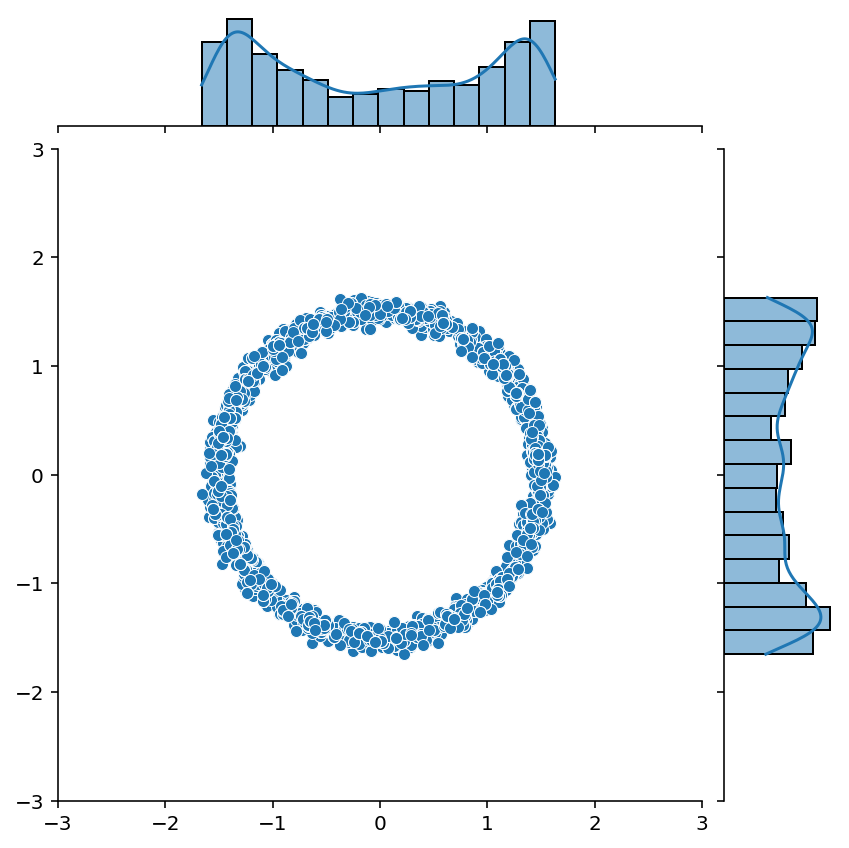

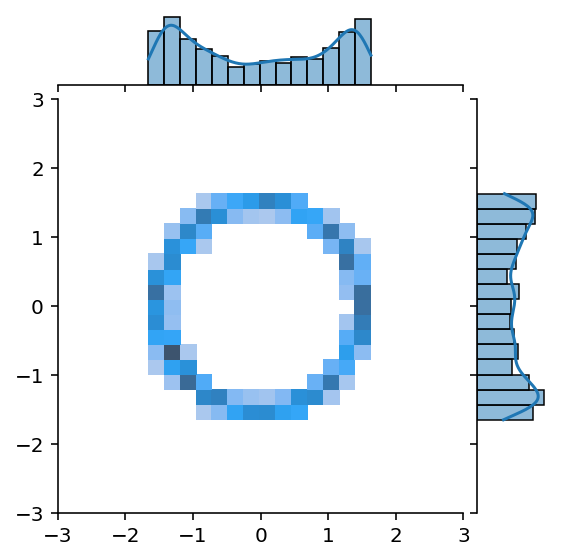

In [51]:
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()

x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y, height=4,xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

#### Directly from NUTS

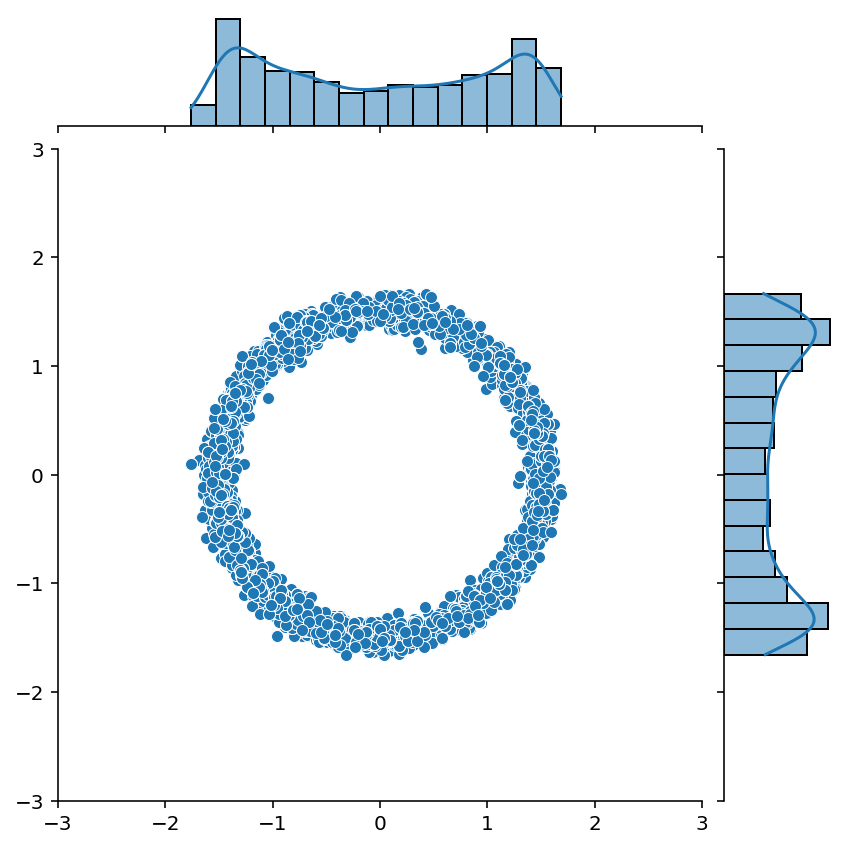

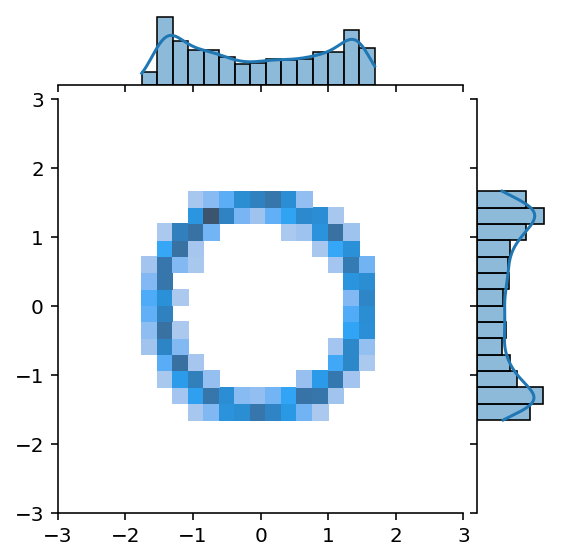

In [52]:
steps = NUTS2(np.array([0.5,1.5]),0.125,10000)[1:]
xlist = [x[0] for x,_ in steps]
ylist = [x[1] for x,_ in steps]
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()

x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y, height=4,xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

In [135]:
x = np.array([-1.29469502 ,0.73366737])
p = np.random.multivariate_normal([0,0],np.identity(2)) 
u = np.random.random()*np.exp(logf(x)-0.5*p.T@p)
xm,xp = x.copy(),x.copy()
pm,pp = p.copy(),p.copy()
j = 0
C = [(x,p)]
steps = [C]
s = 1
dt=findReasonableEpsilon(x,logf)
while s==1:
    v = np.sign(np.random.uniform(-1,1))
    if v == -1:
        xm,pm,_,_,Cp,sp = buildTree(xm,pm,u,v,j,dt)
    else:
        _,_,xp,pp,Cp,sp = buildTree(xp,pp,u,v,j,dt)
    if sp ==1:
        C = C+Cp
        steps.append(Cp)
    s = sp*(1 if (xp-xm)@pm >=0 else 0)*(1 if (xp-xm)@pp >=0 else 0)
    j+=1
print("Total tree Depth",j)


Total tree Depth 6


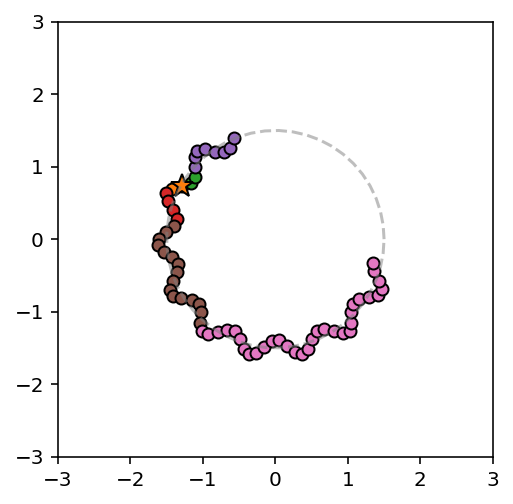

In [136]:
x0 = np.array([-1.29469502 ,0.73366737])
for Ci in steps:
    xs = [xi[0] for xi,_ in Ci]
    ys = [xi[1] for xi,_ in Ci]
    plt.plot(xs,ys,'o-',markeredgewidth=1,markeredgecolor='k')
plt.plot(x[0],x[1],'*C1',ms=12,markeredgewidth=1,markeredgecolor='k')
thetas = np.linspace(0,2*np.pi)
plt.plot(1.5*np.cos(thetas),1.5*np.sin(thetas),'--',alpha=0.5)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
def animate(i):
    ax.cla()
    
    thetas = np.linspace(0,2*np.pi)
    ax.plot(1.5*np.cos(thetas),1.5*np.sin(thetas),'--',alpha=0.5)
    ax.set_xlim((-3,3))
    ax.set_ylim((-3,3))
    ax.set_aspect('equal')
    for j in range(0,i):
        xs = [xi[0] for xi,_ in steps[j]]
        ys = [xi[1] for xi,_ in steps[j]]
        ax.plot(xs,ys,'o--C'+str(j%10),alpha=0.4,markeredgewidth=1,markeredgecolor='k')
    
    xs = [xi[0] for xi,_ in steps[i]]
    ys = [xi[1] for xi,_ in steps[i]]
    ax.plot(xs,ys,'o--C'+str(i%10),markeredgewidth=1,markeredgecolor='k')
    
    plt.plot(x[0],x[1],'*C1',ms=12,markeredgewidth=1,markeredgecolor='k')
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(steps),interval=1000)
HTML(ani.to_jshtml())

#### Larger Ring

In [137]:
def logf(x):
    r = 1.5
    sigma = 0.1
    rx= np.linalg.norm(x)
    return -(r-rx)**2/sigma
def grad_logf(x):
    r = 1.5
    sigma = 0.1
    rx = np.linalg.norm(x)
    if rx==0.: return np.array([0,0])
    return 2*(r/rx-1)*x/sigma

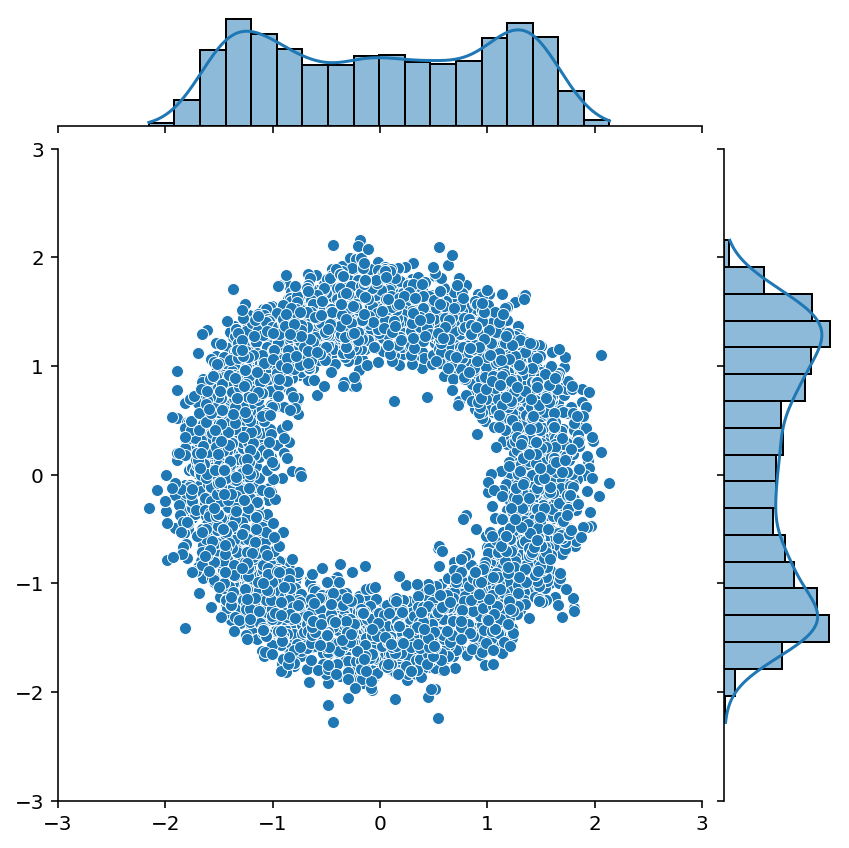

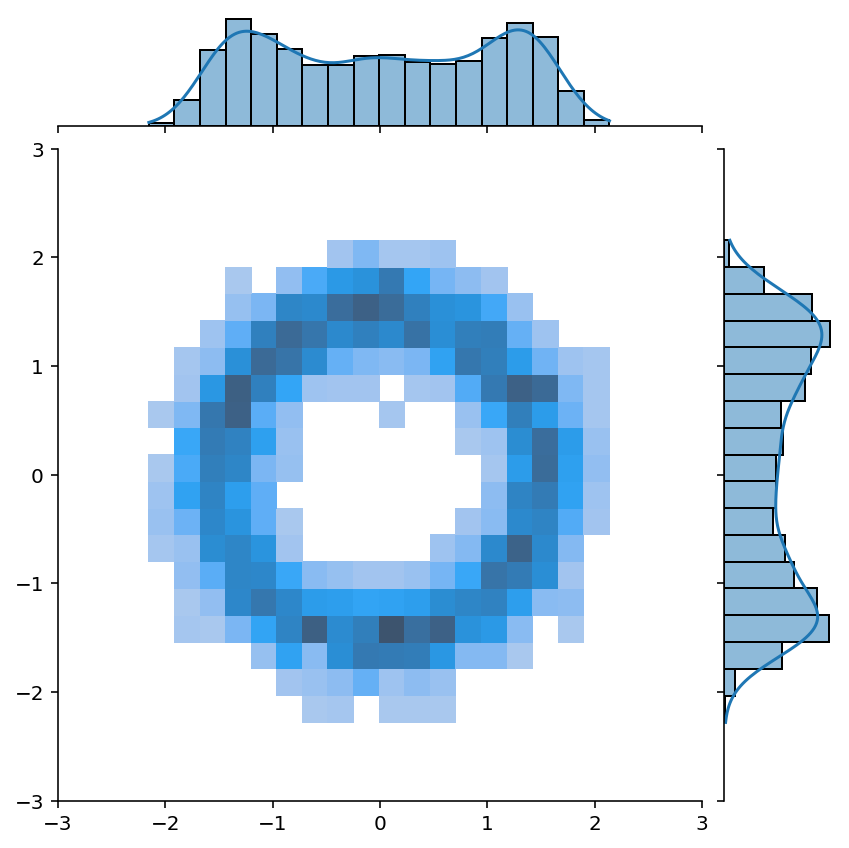

In [138]:
steps = NUTS2(np.array([0.5,1.5]),0.125,10000)[1:]
xlist = [x[0] for x,_ in steps]
ylist = [x[1] for x,_ in steps]
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()
x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y, xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

dt= 0.25
Total tree Depth 4


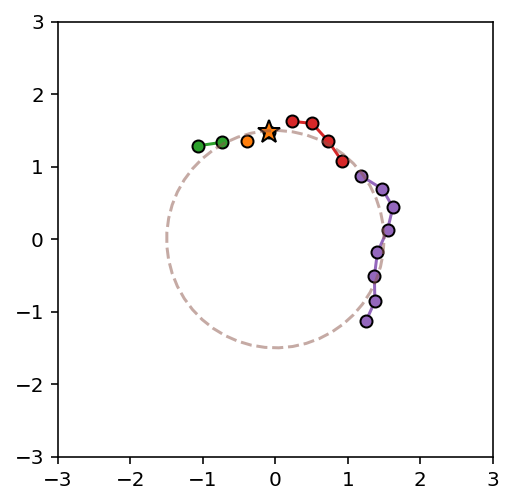

In [139]:
x = np.array([xlist[217],ylist[217]])
p = np.random.multivariate_normal([0,0],np.identity(2)) 
u = np.random.random()*np.exp(logf(x)-0.5*p.T@p)
xm,xp = x.copy(),x.copy()
pm,pp = p.copy(),p.copy()
j = 0
C = [(x,p)]
steps = [C]
s = 1
dt=.25#findReasonableEpsilon(x,logf)
print("dt=",dt)
while s==1:
    v = np.sign(np.random.uniform(-1,1))
    if v == -1:
        xm,pm,_,_,Cp,sp = buildTree(xm,pm,u,v,j,dt)
    else:
        _,_,xp,pp,Cp,sp = buildTree(xp,pp,u,v,j,dt)
    if sp ==1:
        C = C+Cp
        steps.append(Cp)
    s = sp*(1 if (xp-xm)@pm >=0 else 0)*(1 if (xp-xm)@pp >=0 else 0)
    j+=1
print("Total tree Depth",j)
for Ci in steps:
    xs = [xi[0] for xi,_ in Ci]
    ys = [xi[1] for xi,_ in Ci]
    plt.plot(xs,ys,'o-',markeredgewidth=1,markeredgecolor='k')
    x0 = np.array([-1.29469502 ,0.73366737])
plt.plot(x[0],x[1],'*C1',ms=12,markeredgewidth=1,markeredgecolor='k')
thetas = np.linspace(0,2*np.pi)
plt.plot(1.5*np.cos(thetas),1.5*np.sin(thetas),'--',alpha=0.5)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.gca().set_aspect('equal')
plt.show()

# Effecient NUTS (Alg3)

In [62]:
def buildTree3(x,p,u,v,j,dt):
    #Based on alg 3 1111.4246
    Delta_max = 1000
    if j==0:
        #Base case -take one leapfrog step in direction v
        xnew,pnew = leapfrog(x,p,v*dt,grad_logf)

        logH = 0.5*pnew.T@pnew - logf(xnew)
        n = 1 if np.log(u)<= -logH else 0
        s = 1 if np.log(u)< Delta_max-logH else 0
        return xnew,pnew,xnew,pnew,xnew,n,s
    else:
        # recursion - build the left and right subtrees
        xm,pm,xp,pp,xnew,n,s = buildTree3(x,p,u,v,j-1,dt)
        if s == 1:     
            if v==-1:
                xm,pm,_,_,xnew2,n_p,sp = buildTree3(xm,pm,u,v,j-1,dt)
            else:
                _,_,xp,pp,xnew2,n_p,sp = buildTree3(xp,pp,u,v,j-1,dt)
            if n_p!=0 and np.random.random()< n_p/(n_p+n): xnew = xnew2

            s = sp *(1 if (xp-xm)@pm >=0 else 0)*(1 if (xp-xm)@pp >=0 else 0)
            n += n_p
        return xm,pm,xp,pp,xnew,n,s
def NUTS3(x0,dt,M=1):
    x=x0.copy()
    xlist = [x,]
    for m in range(M):
        p = np.random.multivariate_normal([0,0],np.identity(2)) 
        u = np.random.random()*np.exp(logf(x)-0.5*p.T@p)
        xm,xp = x.copy(),x.copy()
        pm,pp = p.copy(),p.copy()
        j = 0
        n,s = 1,1
        while s==1:
            v = np.sign(np.random.uniform(-1,1)) 
            if v == -1:
                xm,pm,_,_,xnew,n_p,sp = buildTree3(xm,pm,u,v,j,dt)
            else:
                _,_,xp,pp,xnew,n_p,sp = buildTree3(xp,pp,u,v,j,dt)
            
            if sp ==1:
                if np.random.random()< n_p/(n): x = xnew.copy()
            s = sp*(1 if (xp-xm)@pm >=0 else 0)*(1 if (xp-xm)@pp >=0 else 0)
            n+=n_p
            j+=1
        xlist.append((x,p))
    return xlist

In [ ]:
steps = NUTS3(np.array([0.5,1.5]),0.125,10000)[1:]
xlist = [x[0] for x,_ in steps]
ylist = [x[1] for x,_ in steps]
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()

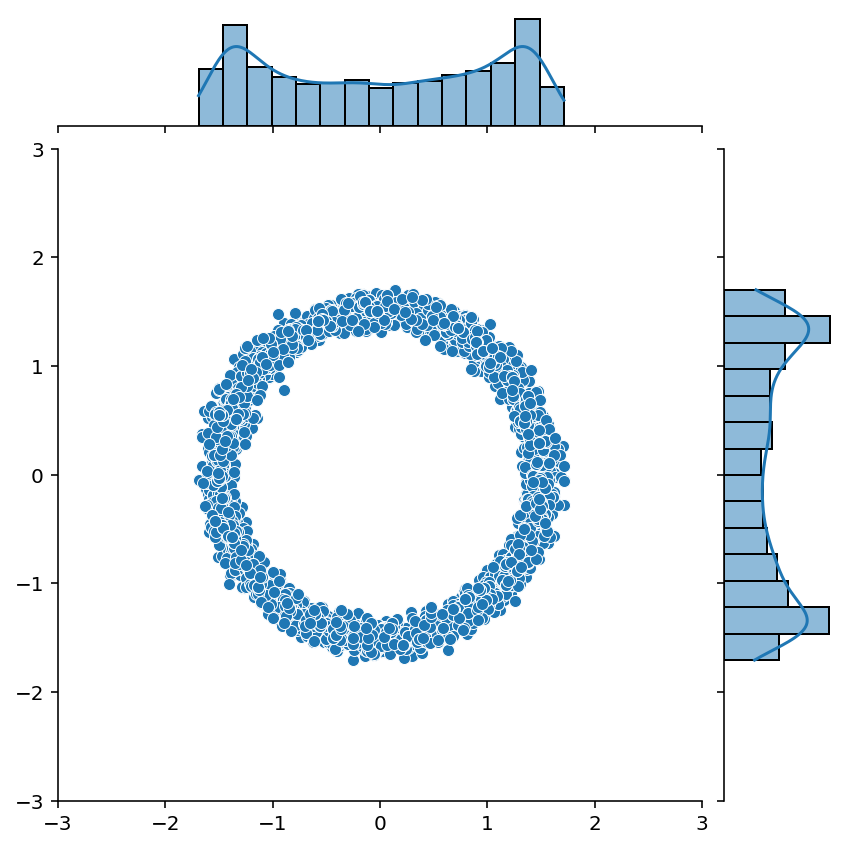

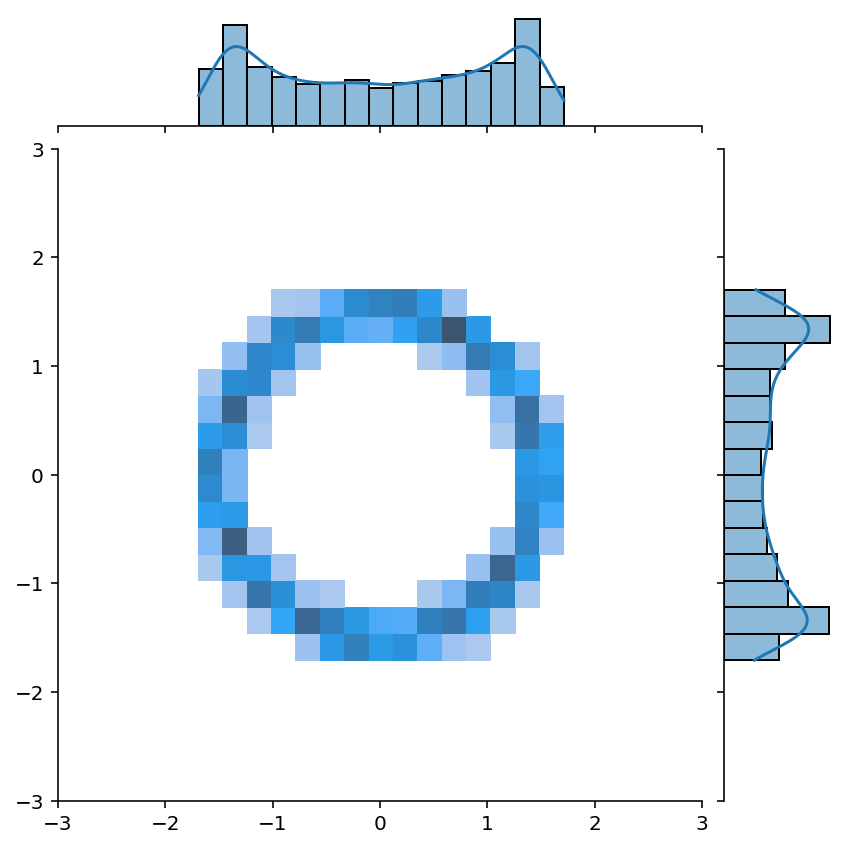

In [145]:
steps = NUTS3(np.array([0.5,1.5]),0.125,10000)[1:]
xlist = [x[0] for x,_ in steps]
ylist = [x[1] for x,_ in steps]
sns.jointplot(x=xlist[len(xlist)//2:],y=ylist[len(ylist)//2:],
              ylim=(-3, 3), xlim=(-3, 3),marginal_kws=dict(kde=True),
            )
plt.show()
x=xlist[len(xlist)//2:]
y=ylist[len(ylist)//2:]
lim = (-3,3)
g = sns.JointGrid(x=x, y=y,xlim=lim,ylim=lim)
# sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x, y=y, ax=g.ax_joint,)
sns.histplot(y=y,ax=g.ax_marg_y,kde=True)
sns.histplot(x=x,ax=g.ax_marg_x,kde=True)
plt.show()

/home/ryan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ryan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


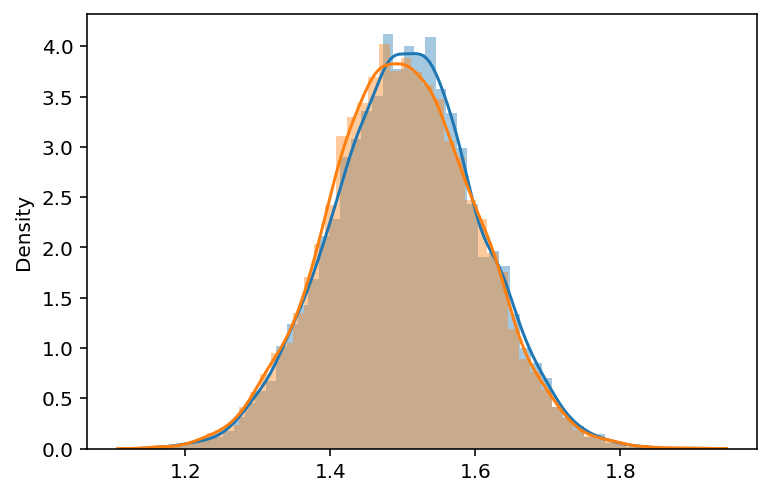

In [199]:
def logf(x):
    r = 1.5
    sigma = 0.01
    rx= np.linalg.norm(x)
    return -(r-rx)**2/(2*sigma)
def grad_logf(x):
    r = 1.5
    sigma = 0.01
    rx = np.linalg.norm(x)
    if rx==0.: return np.array([0,0])
    return 2*(r/rx-1)*x/(2*sigma)

steps = NUTS3(np.array([0.5,1.5]),0.125,10000)[1000:]
xlist = [x[0] for x,_ in steps]
ylist = [x[1] for x,_ in steps]

sns.distplot(np.sqrt(np.array(xlist)**2+np.array(ylist)**2))
samples = np.random.normal(1.5,np.sqrt(0.01),10000)
sns.distplot(samples)
plt.show()

dt= 0.125
Total tree Depth 5


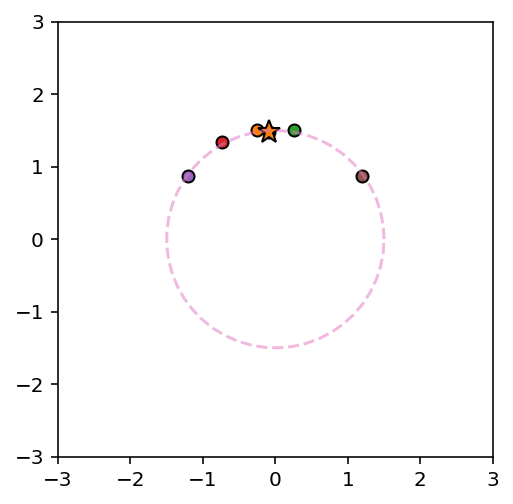

In [144]:
x = np.array([xlist[217],ylist[217]])
p = np.random.multivariate_normal([0,0],np.identity(2)) 
u = np.random.random()*np.exp(logf(x)-0.5*p.T@p)
xm,xp = x.copy(),x.copy()
pm,pp = p.copy(),p.copy()
j = 0
C = [(x,p)]
steps = [C]
s = 1
dt=.125#findReasonableEpsilon(x,logf)
print("dt=",dt)
j = 0
n,s = 1,1
while s==1:
    v = np.sign(np.random.uniform(-1,1)) 
    if v == -1:
        xm,pm,_,_,xnew,n_p,sp = buildTree3(xm,pm,u,v,j,dt)
    else:
        _,_,xp,pp,xnew,n_p,sp = buildTree3(xp,pp,u,v,j,dt)
    
    if sp ==1:
        if np.random.random()< n_p/(n): 
            x = xnew.copy()
            steps.append([(x,p)])
        
    s = sp*(1 if (xp-xm)@pm >=0 else 0)*(1 if (xp-xm)@pp >=0 else 0)
    n+=n_p
    j+=1
print("Total tree Depth",j)
for Ci in steps:
    xs = [xi[0] for xi,_ in Ci]
    ys = [xi[1] for xi,_ in Ci]
    plt.plot(xs,ys,'o-',markeredgewidth=1,markeredgecolor='k')
x0 = np.array([xlist[217],ylist[217]])
plt.plot(x0[0],x0[1],'*C1',ms=12,markeredgewidth=1,markeredgecolor='k')
thetas = np.linspace(0,2*np.pi)
plt.plot(1.5*np.cos(thetas),1.5*np.sin(thetas),'--',alpha=0.5)
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.gca().set_aspect('equal')
plt.show()